# Chapter 3 Linear Regression Example 2


## Packt Publishing

In [1]:
# imports
%matplotlib inline

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# read data 
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Model Creation
We fit a linear model from each of the models to the target that is sales

In [3]:
# Features and target for a single field
feature_cols = ['radio']
x = data[feature_cols]
y = data.sales

# Fit the model
model = LinearRegression()
model.fit(x, y)

# print the coefficients
print model.intercept_
print model.coef_

9.31163809516
[ 0.20249578]


The corelation of each of the features separately can also be seen in the plot below

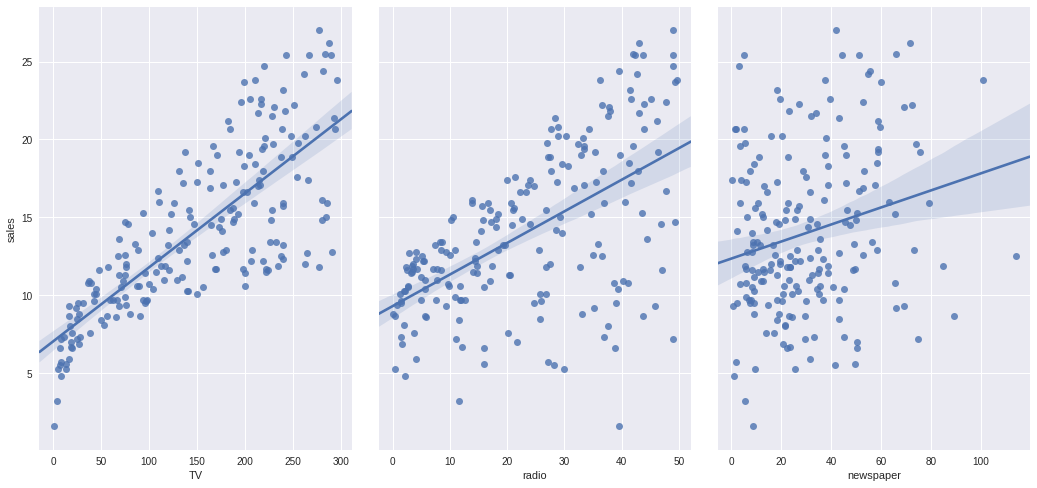

In [4]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Using the Model for Prediction

Suppose we spend **$100,000** on radio advertising. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 9.31163809516 + 0.20249578 \times 100$$

In [5]:
# manually calculate the prediction
9.31163809516 + 0.20249578*100

29.56121609516

In [6]:
# Verify with the model prediction
model.predict(100)

array([ 29.56121643])

## Multiple Linear Regression

Linear regression extended to include multiple features is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


Looking at the relative impact of all 3 factors together on advertising

In [7]:
# create X and y
feature_cols = ['radio','TV','newspaper']
X = data[feature_cols]
y = data.sales

# Fit the model
model_multifeature = LinearRegression()
model_multifeature.fit(X, y)

# print the coefficients
print('Intercept: %f'%(model_multifeature.intercept_))
print dict(zip(feature_cols, model_multifeature.coef_))

Intercept: 2.938889
{'TV': 0.045764645455397643, 'newspaper': -0.0010374930424763007, 'radio': 0.18853001691820434}
